                            OLS Regression Results                            
Dep. Variable:          Consumption_Y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     146.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.22e-12
Time:                        11:50:24   Log-Likelihood:                -137.23
No. Observations:                  30   AIC:                             278.5
Df Residuals:                      28   BIC:                             281.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0588     14.221      0.707      0.4

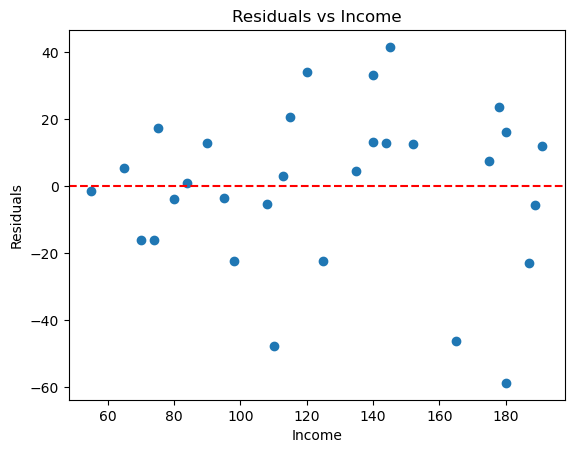

Breusch-Pagan test LM Statistic: 2.6830, p-value: 0.1014
No heteroskedasticity detected.


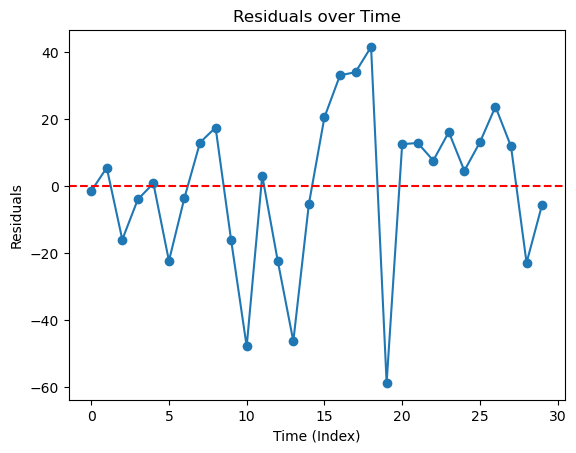

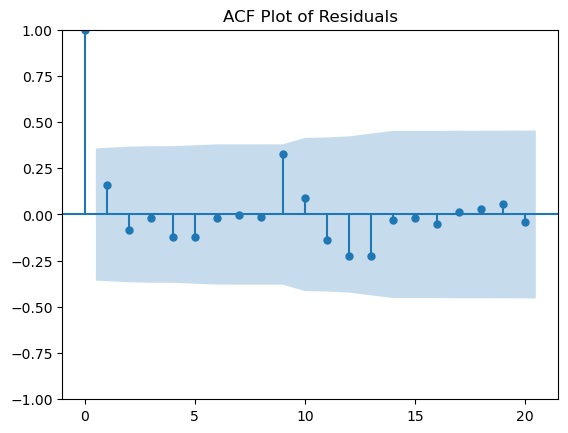

Durbin-Watson Statistic: 1.6758
Interpretation: near 2 = no autocorr; near 0 = positive autocorr; near 4 = negative autocorr


In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

X = [55, 65, 70, 80, 84, 98, 95, 90, 75, 74, 110, 113, 125, 165,
     108, 115, 140, 120, 145, 180, 152, 144, 175, 180, 135, 140, 178,
     191, 187, 189]
Y = [80, 100, 85, 110, 120, 115, 130, 140, 125, 90, 105, 160, 150, 178,
     145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265,
     270, 230, 250]

df = pd.DataFrame({'Income_X': X, 'Consumption_Y': Y})

X_const = sm.add_constant(df['Income_X'])
model = sm.OLS(df['Consumption_Y'], X_const)
results = model.fit()
print(results.summary())

residuals = results.resid

plt.scatter(df['Income_X'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Income')
plt.xlabel('Income')
plt.ylabel('Residuals')
plt.show()

bp_test = het_breuschpagan(residuals, results.model.exog)
print(f"Breusch-Pagan test LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
print("Heteroskedasticity present." if bp_test[1] < 0.05 else "No heteroskedasticity detected.")

plt.plot(df.index, residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Residuals')
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF Plot of Residuals')
plt.show()

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
print("Interpretation: near 2 = no autocorr; near 0 = positive autocorr; near 4 = negative autocorr")



In [7]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2
import pandas as pd

x = [55, 65, 70, 80, 84, 98, 95, 90, 75, 74, 110, 113, 125, 165,
     108, 115, 140, 120, 145, 180, 152, 144, 175, 180, 135, 140, 178,
     191, 187, 189]
y = [80, 100, 85, 110, 120, 115, 130, 140, 125, 90, 105, 160, 150, 178,
     145, 180, 225, 200, 240, 185, 220, 210, 245, 260, 190, 205, 265,
     270, 230, 250]


X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
residuals = model.resid

print("=== Step 1: OLS Estimation ===")
print("Coefficients:")
print(model.params)
print("\nResiduals:")
print(residuals)
print("\n")

n = len(y)
sigma2 = np.sum(residuals**2) / n
print("=== Step 2: MLE of sigma^2 ===")
print(f"sigma^2 = {sigma2:.4f}")
print("\n")

Pi = (residuals**2) / sigma2
print("=== Step 3: Pi values ===")
print(Pi)
print("\n")

aux_model = sm.OLS(Pi, X).fit()

print("=== Step 4: Auxiliary Regression Results ===")
print(aux_model.summary())
print("\n")

SSreg = aux_model.ess
theta = 0.5 * SSreg
df = X.shape[1] - 1

print("=== Step 5: Test Statistic Calculation ===")
print(f"Explained Sum of Squares (SSreg): {SSreg:.4f}")
print(f"Test statistic (theta) = 1/2 * SSreg = {theta:.4f}")
print(f"Degrees of freedom = {df}")
print("\n")

chi_square_crit = chi2.ppf(0.95, df)
print("=== Step 6: Hypothesis Testing ===")
print(f"Chi-square critical value (df={df}, alpha=0.05): {chi_square_crit:.4f}")

if theta > chi_square_crit:
    print("Reject null hypothesis: Evidence of heteroscedasticity.")
else:
    print("Fail to reject null hypothesis: No evidence of heteroscedasticity.")


=== Step 1: OLS Estimation ===
Coefficients:
[10.05877944  1.2986333 ]

Residuals:
[ -1.48361108   5.5300559  -15.96311062  -3.94944364   0.85602315
 -22.32484308  -3.42894318  13.06422333  17.54372287 -16.15764383
 -47.90844271   3.19565738 -22.38794225 -46.33327435  -5.31117611
  20.59839077  33.13255821  34.10522426  41.6393917  -58.81277389
  12.54895858  12.938025     7.68039263  16.18722611   4.62572472
  13.13255821  23.78449272  11.90225979 -22.903207    -5.50047361]


=== Step 2: MLE of sigma^2 ===
sigma^2 = 550.5060


=== Step 3: Pi values ===
[3.99832513e-03 5.55516564e-02 4.62884903e-01 2.83341254e-02
 1.33109481e-03 9.05346445e-01 2.13578999e-02 3.10031030e-01
 5.59089695e-01 4.74235468e-01 4.16928976e+00 1.85506184e-02
 9.10471439e-01 3.89963497e+00 5.12412098e-02 7.70734069e-01
 1.99410448e+00 2.11290412e+00 3.14953706e+00 6.28320598e+00
 2.86057502e-01 3.04070258e-01 1.07153118e-01 4.75973569e-01
 3.88684784e-02 3.13282863e-01 1.02760393e+00 2.57333793e-01
 9.52863228e-